In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

from keras.datasets import mnist
from sklearn.decomposition import PCA

In [ ]:
# MNIST Data Loading
(X_train, Y_train),(X,y) = mnist.load_data()

del X_train
del Y_train

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"MNIST Data Shape : {X.shape}")
print(f"MNIST Label Shape : {y.shape}")

MNIST Data Shape : (10000, 28, 28)
MNIST Label Shape : (10000,)


In [ ]:
X = X.reshape(-1, 28*28)

In [ ]:
X.shape

(10000, 784)

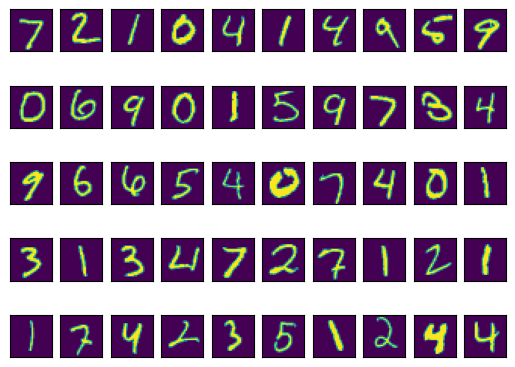

In [ ]:
# MNIST Visualization
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images):
            plt.subplot(int(num_images/10),10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

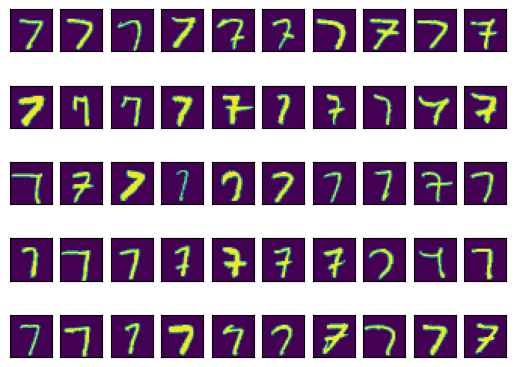

In [ ]:
# 특정 숫자 보여주기
def show_images_by_digit(digit_to_see):
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50):
            plt.subplot(5,10, digit_num+1) #create subplots
            #reshape images
            mat_data = X[indices[0][digit_num]].reshape(28,28)
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images_by_digit(7)

## [PCA Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  - n_components : 몇개의 축으로 차원을 축소할 것인가
  - explained_variance_ : The amount of variance explained by each of the selected components.
  - explained_variance_ratio_ : Percentage of variance explained by each of the selected components.

In [ ]:
# PCA Fitting (to dim 20)
pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X)
print(f"PCA Output shape : {X_pca.shape}")

PCA Output shape : (10000, 20)


In [ ]:
# EigenValue
# Automatically sorted
print(pca.explained_variance_)

[345318.19879505 259288.99521493 211037.3249099  186474.20544221
 172914.01504822 145939.06070515 113806.35947245 101395.54092582
  93819.77931415  78291.75071003  73337.85076374  72007.98286915
  59315.67948222  57936.11010918  54166.57205496  51365.05201192
  44763.98948569  43937.75283894  40554.96369941  39457.24715618]


In [ ]:
# EigenValue Ratio
print(pca.explained_variance_ratio_)

[0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685757 0.01576075 0.0149456  0.0130249  0.01278449
 0.01180021 0.01148081]


In [ ]:
sum(pca.explained_variance_ratio_)

0.6532610990190268

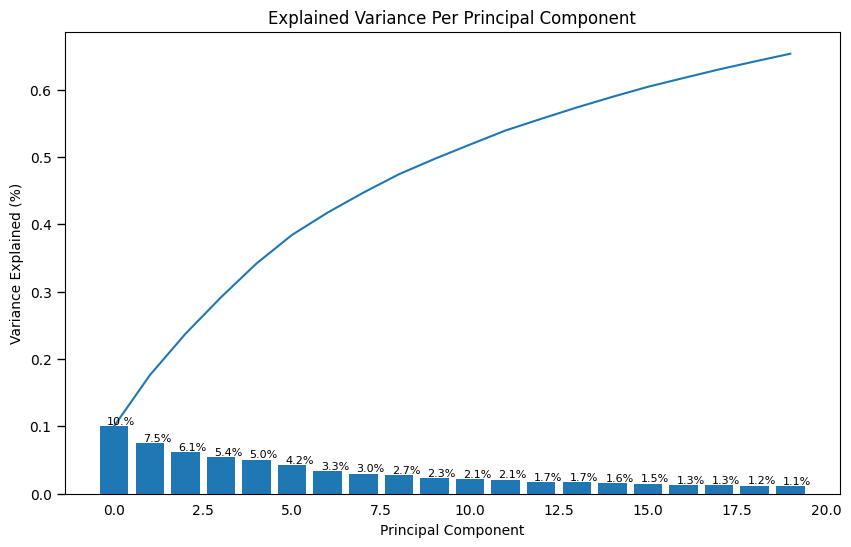

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]),
                    va="bottom",
                    ha="center",
                    fontsize=8)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [ ]:
# Redesign
new_coordinates = np.vstack((X_pca[:,:2].T, y)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0    -411.260996    -686.561604    7.0
1      58.065935     983.170254    2.0
2    -935.105339     459.074662    1.0
3    1255.666506    -106.992545    0.0
4     132.887049    -744.541840    4.0


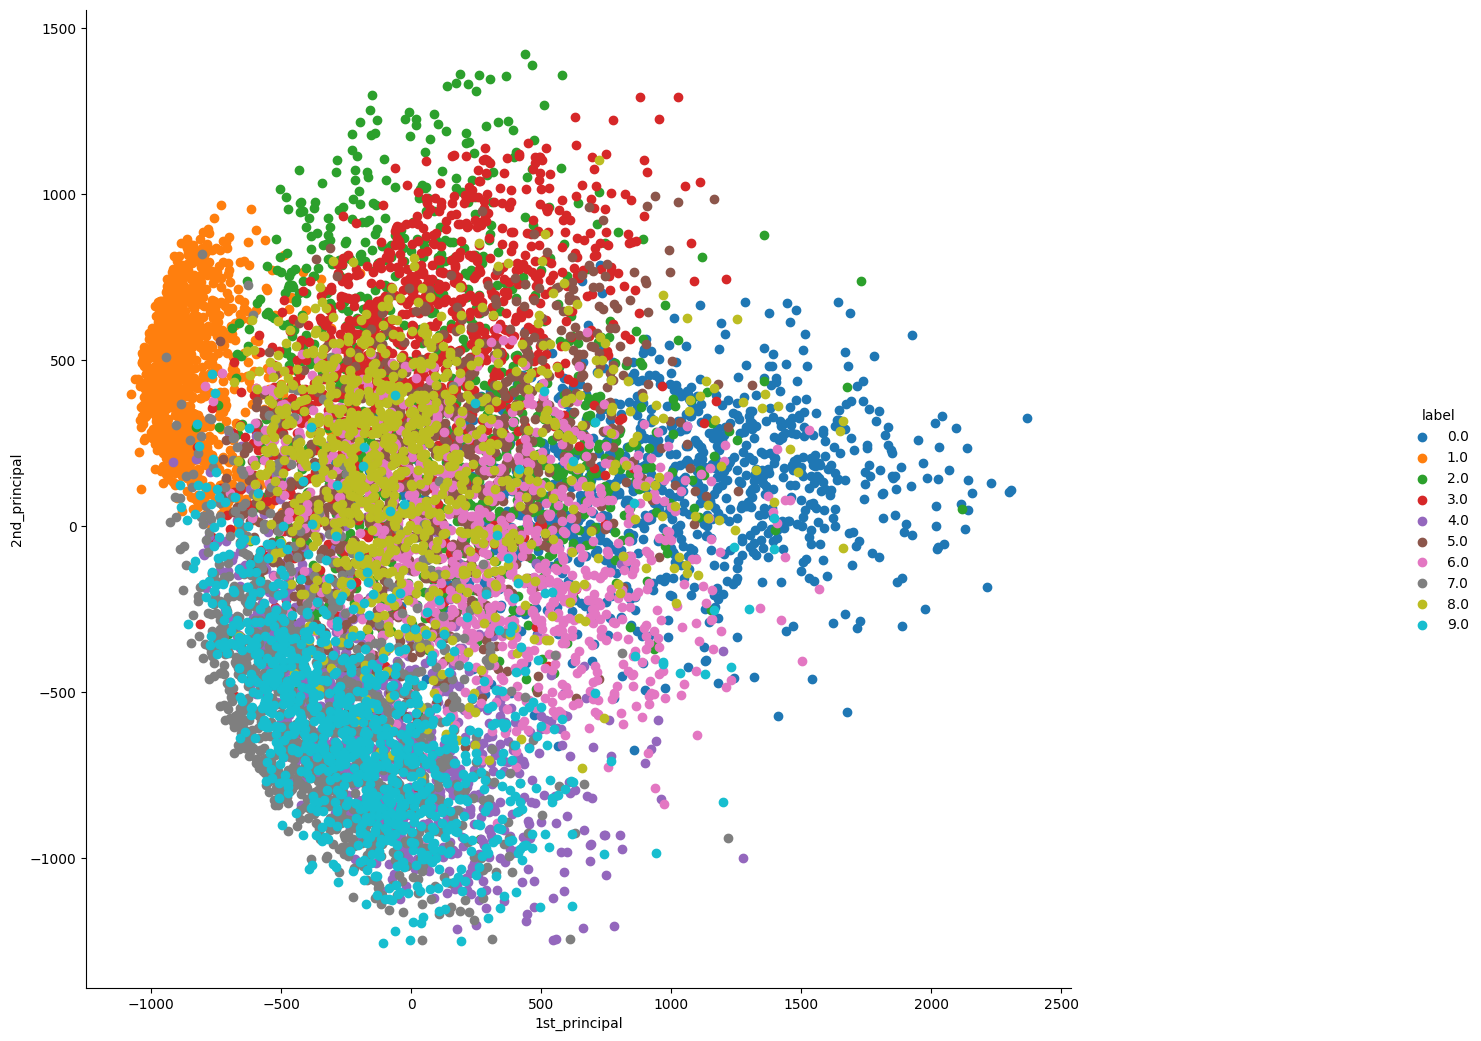

In [29]:
# Plotting
sns.FacetGrid(dataframe, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend().fig.set_size_inches(20,13)
plt.show()